## Examples

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
##Check missing values

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [22]:
##Delete the row or data point to handle missing values

df.shape

(891, 15)

In [23]:
df.dropna().shape

(182, 15)

In [24]:
##Column wise deletion

#df.dropna(axis=1),for removing null value from column

# Imputation Missing Value
## 1) mean value imputation
### mean imputation works well when we have normally distributed data(Symetrically distribited data)

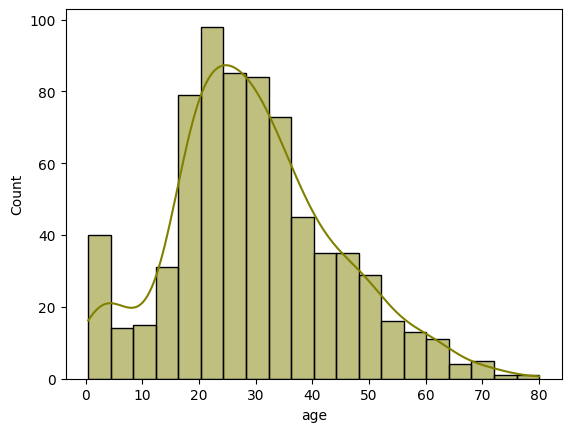

In [25]:
sns.histplot(
    df['age'],
    kde=True,
    color='olive')
plt.Figure(figsize=(7,5))
plt.show()

In [26]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [27]:
df[['age_mean','age']].head()

,age_mean,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0


# 2)median value imputation
## median imputation works well when we have outliers.

In [28]:
df['Age_median']=df['age'].fillna(df['age'].median())
df[['Age_median','age_mean','age']].head()

,Age_median,age_mean,age
0,22.0,22.0,22.0
1,38.0,38.0,38.0
2,26.0,26.0,26.0
3,35.0,35.0,35.0
4,35.0,35.0,35.0


# 3)mode value imputation 
## mode imputation works well when we have categorical values

In [29]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [30]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [35]:
df['embarked'].mode()

0    S
Name: embarked, dtype: object

In [31]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]
mode_value

'S'

In [32]:
df['mode_embarked']=df['embarked'].fillna(mode_value)
df[['mode_embarked','embarked']].head()

,mode_embarked,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S


In [33]:
df['mode_embarked'].isnull().sum()

np.int64(0)

In [34]:
df['embarked'].isnull().sum()

np.int64(2)